<h2>Name: Rahil Momin </h2>
<h3>Class: Math-345</h3>
<h3>Assignment 4</h3>
<h3>Language Used: Python</h3>
<h3>|||||||||||||||||||||</h3>

<h4>Best K for image used = 8</h4>
<h4>Increase in clusters increases the details of the image but K=8 is better for this perticular image because k=9,k=10 provide only an increase in minor details</h4>

In [1]:
import numpy
import matplotlib.pyplot as plt
import matplotlib.image as img
import random
import pandas as panda

<h4>Original Image used </h4>

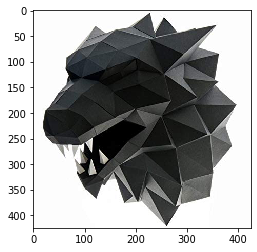

In [2]:
#2d array
image = img.imread("mathAssignmnetPic.jpg")
plt.imshow(image)

size = int(numpy.size(image) / 3)

#425
width = int(numpy.size(image[0]) / 3)

#425
heigth = int(size / width)

resultImage = numpy.zeros((heigth, width, 3))

In [3]:
def CalculateCentroid(kToUse):
    centroids = numpy.zeros([kToUse,3])
    random.seed(random.randint(0, width - 1))

    for i in range(kToUse):   
        unique = False

        while (unique == False):
            unique = True

            index1 = random.randint(0, width - 1)
            index2 = random.randint(0, heigth - 1)

            for j in range(kToUse):
                if(numpy.array_equal(centroids[j], image[index2][index1])):
                    unique = False
                    break


        #[height][width]
        centroids[i] = image[index2][index1]

    return centroids

In [4]:
def ReComputeCentroids(centroidData, size):
    centroid = [0,0,0]

    if(size > 0):
        for i in range(size):
            centroid = numpy.add(centroid, centroidData[i])

        centroid = numpy.multiply(1/size, centroid)

    return centroid

In [5]:
def AssignCluster(sizeArray, kToUse, centroids, centroidData):
    for i in range(width):
        for j in range(heigth):

            index = -1
            minDist = -1
            
            point = image[j][i]
            for c in range(kToUse):
                center = centroids[c]
                dist = numpy.sum(numpy.square(point - center))

                if (dist < minDist or minDist == -1):
                    minDist = dist
                    index = c
            
            centroidData[index][sizeArray[index]] = image[j][i]
            sizeArray[index] = sizeArray[index] + 1

In [6]:
def AssignImage(kToUse, centroidToUse):
    for i in range(width):
        for j in range(heigth):

            index = -1
            minDist = -1
            
            point = image[j][i]
            for c in range(kToUse):
                center = centroidToUse[c]
                dist = numpy.sum(numpy.square(point - center))

                if (dist < minDist or minDist == -1):
                    minDist = dist
                    index = c
            
            resultImage[j][i] = numpy.multiply(1/255,centroidToUse[index])

In [7]:
def CalculateKCluster(kToUse):
    stop = False
    centroids = CalculateCentroid(kToUse)
    centroidsToUse = centroids

    centroidsData = [[[0 for col in range(3)]for row in range(width * heigth)] for x in range(kToUse)]

    while(stop == False):
        stop = True

        sizes = [0 for i in range(kToUse)]

        AssignCluster(sizes, kToUse, centroids, centroidsData)

        centroidsToUse = centroids

        for i in range(kToUse):
            newCentroid = ReComputeCentroids(centroidsData[i],sizes[i])

            if(numpy.sum(newCentroid - centroids[i]) != 0):
                stop = False

            centroids[i] = newCentroid
        if(stop == True):
            break

    AssignImage(kToUse, centroidsToUse)
    plt.imshow(resultImage)

<h4>K-mean clustering output</h4>

<h5>K = 3</h5>

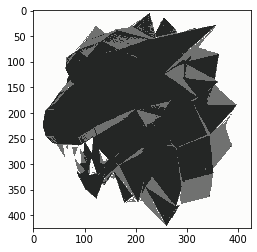

In [12]:
CalculateKCluster(3)

<h5>K = 4</h5>

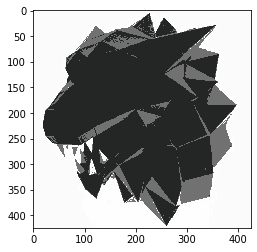

In [18]:
CalculateKCluster(4)

<h5>K = 5</h5>

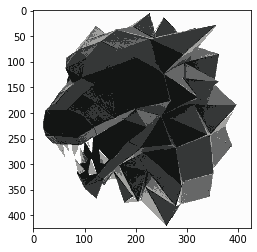

In [19]:
CalculateKCluster(5)

<h5>K = 6</h5>

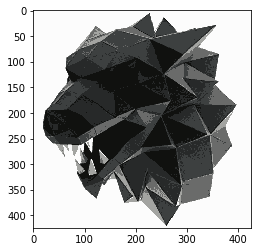

In [20]:
CalculateKCluster(6)

<h5>K = 7</h5>

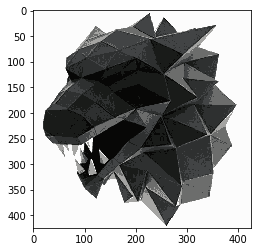

In [21]:
CalculateKCluster(7)

<h5>K = 8</h5>

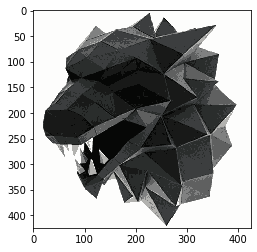

In [8]:
CalculateKCluster(8)

<h5>K = 9</h5>

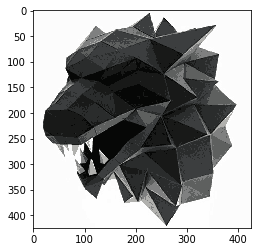

In [9]:
CalculateKCluster(9)

<h5>K = 10</h5>

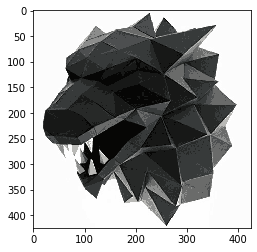

In [10]:
CalculateKCluster(10)